In [109]:
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


In [110]:
def get_data():
    data = load_digits()

    X = data.data
    y = data.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

    return X_train, X_test, y_train, y_test

In [111]:
def compile_fit(net, X_train, X_test, y_train, y_test, batch_size=32):
    model = Sequential()
    model.add(Dense(net[0], input_dim=X_train.shape[1], activation='relu'))
    for i in range(1, len(net)):
        model.add(Dense(net[i], activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=40, validation_data=(X_test, y_test), verbose=0, batch_size=batch_size)
    return model, history

In [118]:
def plot_losses(histories):
    x = histories.keys()

    best_losses = []
    best_val_losses = []

    for history in histories.values():
        min_loss_index = np.argmin(history.history['val_loss'])
        best_losses.append(history.history['loss'][min_loss_index])
        best_val_losses.append(history.history['val_loss'][min_loss_index])

    figure = plt.figure(figsize=(10, 5))
    axe = figure.add_subplot(1, 1, 1)
    axe.plot(x, best_losses, label='Loss')
    axe.plot(x, best_val_losses, label='Validation loss')
    axe.set_xlabel('Batch size')
    axe.set_ylabel('Loss')

    axe.set_ylim([0, 1])

    axe.legend()
    return figure


In [113]:
X_train, X_test, y_train, y_test = get_data()

In [114]:
net = [32, 64, 128, 256, 128, 64, 32]

In [115]:
histories = {}

In [116]:
current_batch_size = 1
while current_batch_size < X_train.shape[0]:
    model, history = compile_fit(net, X_train, X_test, y_train, y_test, batch_size=current_batch_size)
    histories[current_batch_size] = history
    current_batch_size += 30

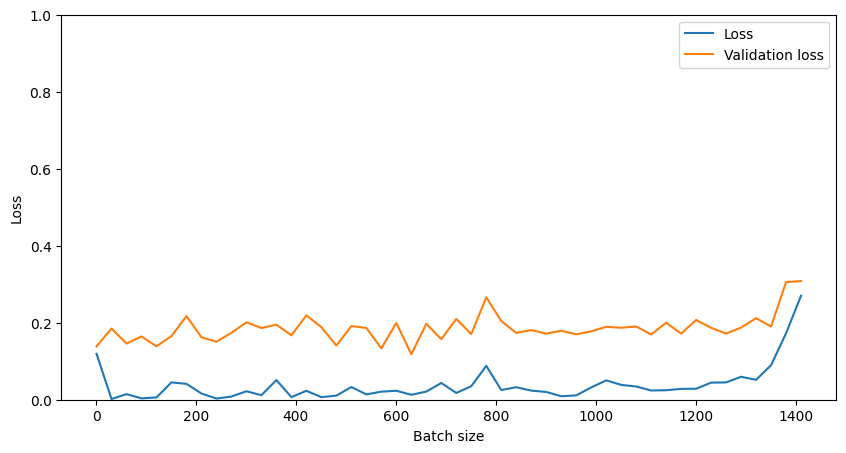

In [119]:
_ = plot_losses(histories)